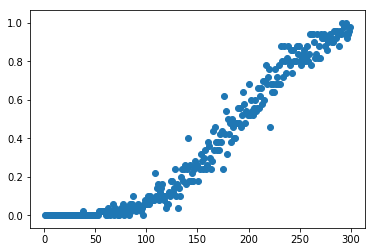

'done'

In [62]:
import pandas as pd
import random
import matplotlib.pyplot as plt

athletes = pd.read_csv('./athletes.csv')
athletes = athletes[athletes['dob'].notnull()]
birthdays = []

for i in athletes['dob']:
    arr = i.split("/")
    birthdays.append([arr[0], arr[1]])
    
def ifparadox(samplesize):
    rand_smpl = [ birthdays[i] for i in sorted(random.sample(range(len(birthdays)), samplesize)) ]
    s = set()
    for i in rand_smpl:
        s.add(str(i[0] + '/' + i[1]))
    if len(s) != samplesize:
        return True
    return False

def classicparadox(trialsize, samplesize):
    counter = 0
    for i in range(trialsize):
        if ifparadox(samplesize):
            counter += 1
    return counter/trialsize

def iffauxbirthdayproblem(samplesize):
    rand_smpl = [birthdays[i] for i in sorted(random.sample(range(len(birthdays)), samplesize))]
    birthday = str(rand_smpl[0][0] + '/' + rand_smpl[0][1])
    for i in rand_smpl[1:]:
        if str(i[0] + '/' + i[1]) == birthday:
            return True
    return False


def fauxbirthdayproblem(trialsize, samplesize):
    counter = 0
    for i in range(trialsize):
        if iffauxbirthdayproblem(samplesize):
            counter += 1
    return counter/trialsize


#Find the probability that atleast a given number of people have the same birthday
def ifbirthdayproblem(samplesize, number): # "number" refers to atleast that number of people having same birthday
    rand_smpl = [birthdays[i] for i in sorted(random.sample(range(len(birthdays)), samplesize))]
    d = {}
    for i in rand_smpl:
        if str(i[0] + '/' + i[1]) in d:
            d[str(i[0] + '/' + i[1])] += 1
        else:
            d[str(i[0] + '/' + i[1])] = 1
    if number in d.values():
        return True
    return False

def birthdayproblem2(trialsize, samplesize, number):
    counter = 0
    for i in range(trialsize):
        if ifbirthdayproblem(samplesize, number):
            counter += 1
    return counter/trialsize


# modify this function to print the above functions
def plot():
    x = []
    y = []
    for i in range(1, 300):
        x.append(i)
        y.append(birthdayproblem2(50, i, 4))
    plt.scatter(x, y)
    plt.show()
    return "done"

plot()